# Import Libraries

In [46]:
import pandas as pd
import time
import matplotlib.pyplot as plt

# Read file

In [47]:
authors = pd.read_csv("data/final_authors_after_properties.csv", low_memory=False, index_col=0).fillna("")

In [48]:
books = pd.read_csv("data/final_dataset_before_properties.csv", low_memory=False, index_col=0).fillna("")

In [45]:
# ids = books["ISBN"]
# books[ids.isin(ids[ids.duplicated()])]
# #.sort("ISBN")

# Merge to have complete book set with properties

In [49]:
books_part = books[["QID","viaf_id","ISBN"]]

In [50]:
books_all = pd.merge(books_part, authors.drop("ISBN", axis=1), on=["viaf_id","QID"], how="left")

In [51]:
books_all.to_csv("data/final_dataset_after_properties.csv")

### Fill the complete dataset

In [54]:
all_books = pd.read_csv("data/items_books_latin.csv", index_col=0, low_memory=False).fillna("")

In [64]:
final_all_books_ISBN = pd.merge(all_books.ISBN, books_all, on = "ISBN", how="left").fillna("")

In [65]:
final_all_books_ISBN.to_csv("data/entire_final_dataset_after_properties.csv")

### Fairbook

In [77]:
fairbook_ISBNs = pd.read_csv("data/fairbook_ratings.csv", index_col=0, low_memory=False).fillna("").ISBN.unique()

In [78]:
fairbook_dataset = final_all_books_ISBN[final_all_books_ISBN.ISBN.isin(fairbook_ISBNs)]

In [80]:
len(fairbook_dataset.ISBN.unique())

6727

In [81]:
len(fairbook_ISBNs)

6921

# First statistics

In [66]:
for col in authors.columns[9:]:
    print(col, sum(authors[col].apply(lambda x: str(x))!=""))

sexuality 245
country 32996
language 4853
religion 2971
gender 39007
ethnicity 1980
birthyear 38275
deathyear 16902


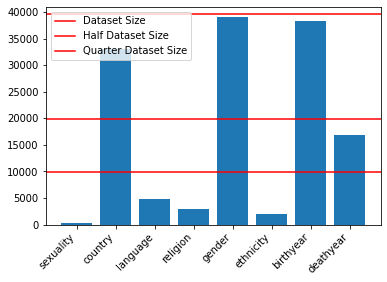

In [71]:
properties_statistics = {}
for col in authors.columns[9:]:
    properties_statistics[col] = len(authors.loc[authors[col].astype("str")!=""])
    #print(col, len(df_authors[col].astype("str").unique()))    print("\n")
plt.bar(range(len(properties_statistics)), list(properties_statistics.values()), align='center')
plt.xticks(range(len(properties_statistics)), list(properties_statistics.keys()),rotation=45, ha="right")
plt.axhline(y=len(authors), color='r', linestyle='-', label = "Dataset Size")
plt.axhline(y=len(authors)/2, color='r', linestyle='-', label = "Half Dataset Size")
plt.axhline(y=len(authors)/4, color='r', linestyle='-', label = "Quarter Dataset Size")

plt.legend()
plt.show()

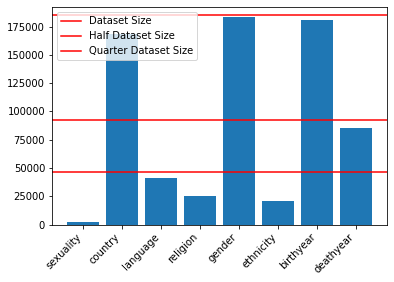

In [72]:
properties_statistics = {}
for col in books_all.columns[9:]:
    properties_statistics[col] = len(books_all.loc[books_all[col].astype("str")!=""])
    #print(col, len(df_authors[col].astype("str").unique()))    print("\n")
plt.bar(range(len(properties_statistics)), list(properties_statistics.values()), align='center')
plt.xticks(range(len(properties_statistics)), list(properties_statistics.keys()),rotation=45, ha="right")
plt.axhline(y=len(books_all), color='r', linestyle='-', label = "Dataset Size")
plt.axhline(y=len(books_all)/2, color='r', linestyle='-', label = "Half Dataset Size")
plt.axhline(y=len(books_all)/4, color='r', linestyle='-', label = "Quarter Dataset Size")
plt.legend()
plt.show()

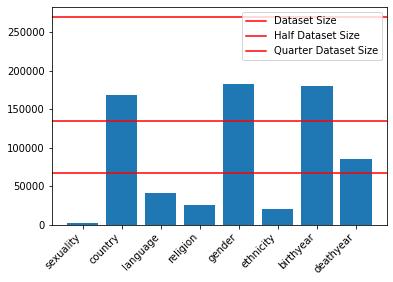

In [73]:
properties_statistics = {}
for col in final_all_books_ISBN.columns[9:]:
    properties_statistics[col] = len(final_all_books_ISBN.loc[final_all_books_ISBN[col].astype("str")!=""])
    #print(col, len(df_authors[col].astype("str").unique()))    print("\n")
plt.bar(range(len(properties_statistics)), list(properties_statistics.values()), align='center')
plt.xticks(range(len(properties_statistics)), list(properties_statistics.keys()),rotation=45, ha="right")
plt.axhline(y=len(final_all_books_ISBN), color='r', linestyle='-', label = "Dataset Size")
plt.axhline(y=len(final_all_books_ISBN)/2, color='r', linestyle='-', label = "Half Dataset Size")
plt.axhline(y=len(final_all_books_ISBN)/4, color='r', linestyle='-', label = "Quarter Dataset Size")
plt.legend()
plt.show()

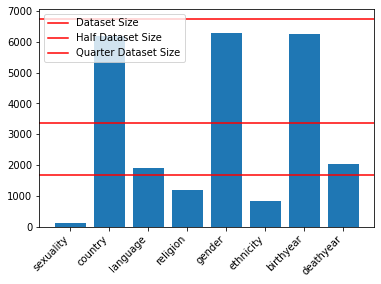

In [82]:
properties_statistics = {}
for col in fairbook_dataset.columns[9:]:
    properties_statistics[col] = len(fairbook_dataset.loc[fairbook_dataset[col].astype("str")!=""])
    #print(col, len(df_authors[col].astype("str").unique()))    print("\n")
plt.bar(range(len(properties_statistics)), list(properties_statistics.values()), align='center')
plt.xticks(range(len(properties_statistics)), list(properties_statistics.keys()),rotation=45, ha="right")
plt.axhline(y=len(fairbook_dataset), color='r', linestyle='-', label = "Dataset Size")
plt.axhline(y=len(fairbook_dataset)/2, color='r', linestyle='-', label = "Half Dataset Size")
plt.axhline(y=len(fairbook_dataset)/4, color='r', linestyle='-', label = "Quarter Dataset Size")
plt.legend()
plt.show()